In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['recording_qubits']) in values_dict:
                    if int(row['num_shots']) in values_dict[int(row['recording_qubits'])]:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['recording_qubits'])] = {int(row['num_shots']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}

In [60]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['recording_qubits']) in values_dict:
                    if int(row['num_shots']) in values_dict[int(row['recording_qubits'])]:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['recording_qubits'])] = {int(row['num_shots']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}
                    
for key, value in values_dict.items():
    print(key, value)

2 {10: {'sumSE': 1.857059848104714, 'rounds': 400}, 20: {'sumSE': 0.938402333493769, 'rounds': 400}, 30: {'sumSE': 0.7886292962519706, 'rounds': 400}, 40: {'sumSE': 0.6639303013005362, 'rounds': 400}, 50: {'sumSE': 0.487228916167078, 'rounds': 400}, 60: {'sumSE': 0.40897703336069574, 'rounds': 400}, 70: {'sumSE': 0.3597876335588707, 'rounds': 400}, 80: {'sumSE': 0.3426270474575866, 'rounds': 400}, 90: {'sumSE': 0.3065439476142555, 'rounds': 400}, 100: {'sumSE': 0.2461119136439684, 'rounds': 400}, 1000: {'sumSE': 0.0019107495257744086, 'rounds': 400}, 10000: {'sumSE': 0.0001914689454703572, 'rounds': 400}, 100000: {'sumSE': 1.8147146129766837e-05, 'rounds': 400}, 1000000: {'sumSE': 1.902858847658328e-06, 'rounds': 400}, 10000000: {'sumSE': 1.778813073846972e-07, 'rounds': 400}}
3 {10: {'sumSE': 0.40386858573223394, 'rounds': 400}, 20: {'sumSE': 0.2182561827959906, 'rounds': 400}, 30: {'sumSE': 0.15669863104278448, 'rounds': 400}, 40: {'sumSE': 0.12392404106725177, 'rounds': 400}, 50: {'

## RMSE against num_shots

In [7]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 9:
                if int(row['recording_qubits']) in values_dict:
                    if int(row['num_shots']) in values_dict[int(row['recording_qubits'])]:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['recording_qubits'])] = {int(row['num_shots']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}
                    
plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')


for key, value in values_dict.items():
    #for num_shots in value:
    #    print(num_shots, value[num_shots])
    x_list = sorted(list(value.keys()))
    y_list = [np.sqrt(value[num_shots]['sumSE']/value[num_shots]['rounds']) for num_shots in x_list]
    plt.plot([int(x) for x in x_list], y_list, label= str(key) + ' Qubits')
plt.plot([int(x) for x in x_list], [1/np.sqrt(int(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([int(x) for x in x_list], [1/int(x) for x in x_list], color = 'black', label='1/N')
plt.xlabel('num_shots')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

## RMSE against Depth or Recording Length (2^t)

50 is an arbitrary constant used

In [96]:
for i in range(2,11):
    print(i, 2**i)

2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024


In [35]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}

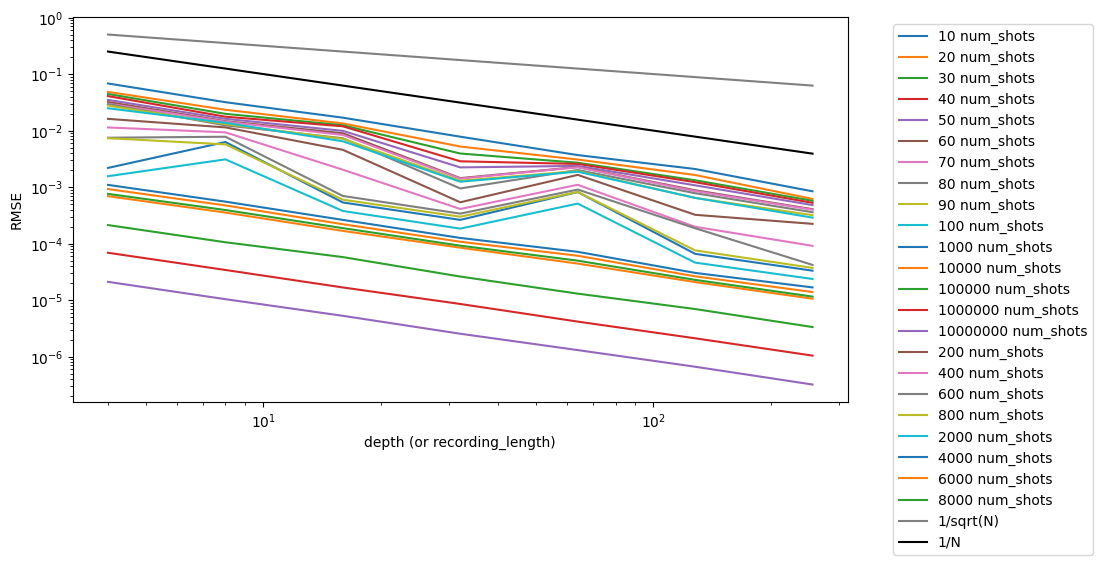

In [4]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 9:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}

plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')


for key, value in values_dict.items():
    x_list = list(value.keys())
    y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
    plt.plot([2**int(x) for x in x_list], y_list, label= str(key) + ' num_shots')
plt.plot([2**int(x) for x in x_list], [1/(np.sqrt(2**int(x))) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([2**int(x) for x in x_list], [1/(2**int(x)) for x in x_list], color = 'black', label='1/N')
plt.xlabel('depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

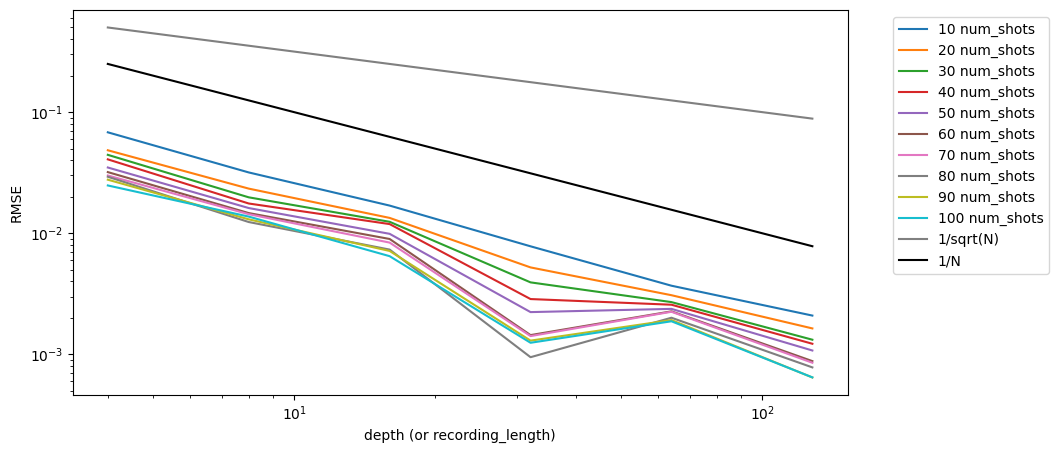

In [66]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}

plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')


for key, value in values_dict.items():
    if key <= 100:
    #for num_shots in value:
    #    print(num_shots, value[num_shots])
        x_list = list(value.keys())
        y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
        plt.plot([2**int(x) for x in x_list], y_list, label= str(key) + ' num_shots')
plt.plot([2**int(x) for x in x_list], [1/(np.sqrt(2**int(x))) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([2**int(x) for x in x_list], [1/(2**int(x)) for x in x_list], color = 'black', label='1/N')
plt.xlabel('depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

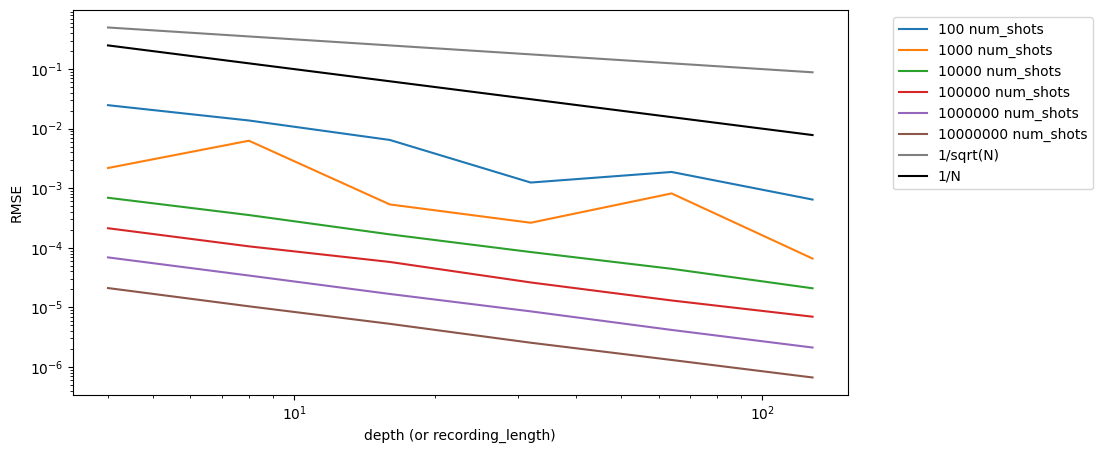

In [68]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')


for key, value in values_dict.items():
    if key >= 100:
        x_list = list(value.keys())
        y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
        plt.plot([2**int(x) for x in x_list], y_list, label= str(key) + ' num_shots')
plt.plot([2**int(x) for x in x_list], [1/(np.sqrt(2**int(x))) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([2**int(x) for x in x_list], [1/(2**int(x)) for x in x_list], color = 'black', label='1/N')
plt.xlabel('depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

# Comparing with the traditional quantum and classical method

Data: 9 recording lengths, 6 num_shots values

In [71]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')

#x_list = []
#y_list = []
for key, value in values_dict.items():
    #if key >= 100:
    num_qubits = list(value.keys())
    x_list = [(key * (2**x)) for x in num_qubits]
    y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
    plt.scatter(x_list, y_list, label= str(key) + ' num_shots')

#plt.plot(x_list, y_list, label= str(key) + ' num_shots')
x_list = range(40, 1280000000+1, 10000000)
plt.plot(x_list, [1/(np.sqrt(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot(x_list, [1/(x) for x in x_list], color = 'black', label='1/N')
plt.plot(x_list, [0.5 * (1/(x)) for x in x_list], color = 'lightgrey', label='traditional QPE')
plt.xlabel('Resources = num_shots * depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

## Attempts to find an optimal ratio

In [101]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (10, 10))
plt.xscale('log')
plt.yscale('log')

#x_list = []
#y_list = []
for key, value in values_dict.items():
    if key <= 100:
        num_qubits = list(value.keys())
        x_list = [(key * (2**x)) for x in num_qubits]
        y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
        plt.plot(x_list, y_list, label= str(key) + ' num_shots')

#plt.plot(x_list, y_list, label= str(key) + ' num_shots')
x_list = range(40, 12800+1, 100)
plt.plot(x_list, [1/(np.sqrt(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot(x_list, [1/(x) for x in x_list], color = 'black', label='1/N')
plt.plot(x_list, [0.5 * (1/(x)) for x in x_list], color = 'lightgrey', label='traditional QPE')
plt.xlabel('Resources = num_shots * depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

In [72]:
#10 - 10,000,000
#2-7
print(10/(2**7))
print(10000000/(2**2))


0.078125
2500000.0


In [73]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')

#x_list = []
#y_list = []
for key, value in values_dict.items():
    #if key >= 100:
    num_qubits = list(value.keys())
    x_list = [(key / (2**x)) for x in num_qubits]
    y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
    plt.scatter(x_list, y_list, label= str(key) + ' num_shots')

#plt.plot(x_list, y_list, label= str(key) + ' num_shots')
#x_list = range(40, 1280000000+1, 10000000)
#plt.plot(x_list, [1/(np.sqrt(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
#plt.plot(x_list, [1/(x) for x in x_list], color = 'black', label='1/N')
#plt.plot(x_list, [0.5 * (1/(x)) for x in x_list], color = 'lightgrey', label='traditional QPE')
plt.xlabel('Ratio: num_shots / depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

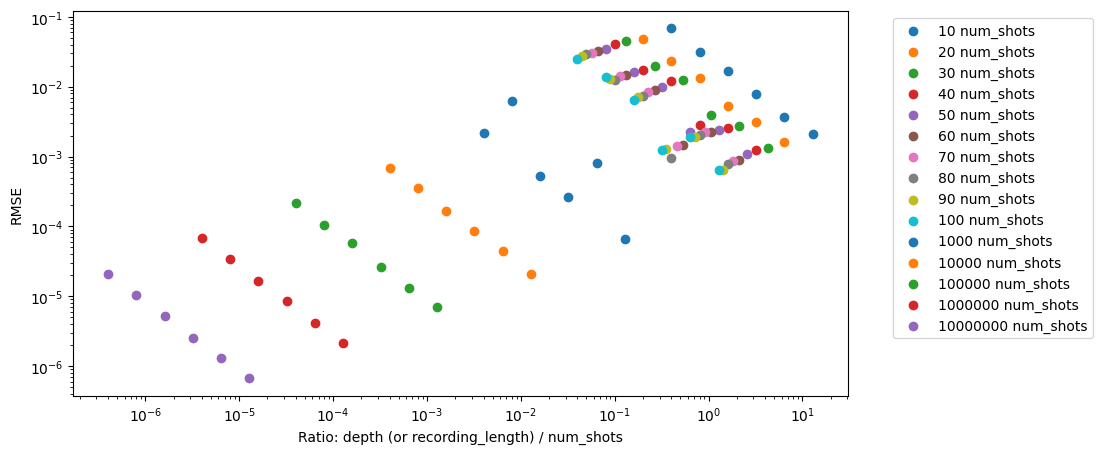

In [78]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (10, 5))
plt.xscale('log')
plt.yscale('log')

#x_list = []
#y_list = []
for key, value in values_dict.items():
    num_qubits = list(value.keys())
    x_list = [((2**x) / key ) for x in num_qubits]
    y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
    plt.scatter(x_list, y_list, label= str(key) + ' num_shots')

#plt.plot(x_list, y_list, label= str(key) + ' num_shots')
#x_list = range(40, 1280000000+1, 10000000)
#plt.plot(x_list, [1/(np.sqrt(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
#plt.plot(x_list, [1/(x) for x in x_list], color = 'black', label='1/N')
#plt.plot(x_list, [0.5 * (1/(x)) for x in x_list], color = 'lightgrey', label='traditional QPE')


plt.xlabel('Ratio: depth (or recording_length) / num_shots')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

In [88]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['recording_qubits']) in values_dict:
                    if int(row['num_shots']) in values_dict[int(row['recording_qubits'])]:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['recording_qubits'])][int(row['num_shots'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['recording_qubits'])] = {int(row['num_shots']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}
                    
plt.figure(figsize = (10, 10))
plt.xscale('log')
plt.yscale('log')


for key, value in values_dict.items():
    #for num_shots in value:
    #    print(num_shots, value[num_shots])
    x_list = list(value.keys())[:11]
    y_list = [np.sqrt(value[num_shots]['sumSE']/value[num_shots]['rounds']) for num_shots in value][:11]
    plt.plot([int(x) for x in x_list], y_list, label= str(key) + ' Qubits')
plt.plot([int(x) for x in x_list], [1/np.sqrt(int(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([int(x) for x in x_list], [1/int(x) for x in x_list], color = 'black', label='1/N')
#plt.xlabel('num_shots')
#plt.ylabel('RMSE')
#plt.legend(bbox_to_anchor=(1.05, 1))

values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}

#plt.figure(figsize = (10, 5))
#plt.xscale('log')
#plt.yscale('log')


for key, value in values_dict.items():
    if key <= 1000:
        x_list = list(value.keys())
        y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
        plt.plot([2**int(x) for x in x_list], y_list, label= str(key) + ' num_shots')
plt.plot([2**int(x) for x in x_list], [1/(np.sqrt(2**int(x))) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot([2**int(x) for x in x_list], [1/(2**int(x)) for x in x_list], color = 'black', label='1/N')
plt.xlabel('depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))

## Attempt to find an optimal ratio which has someee quantum advantage

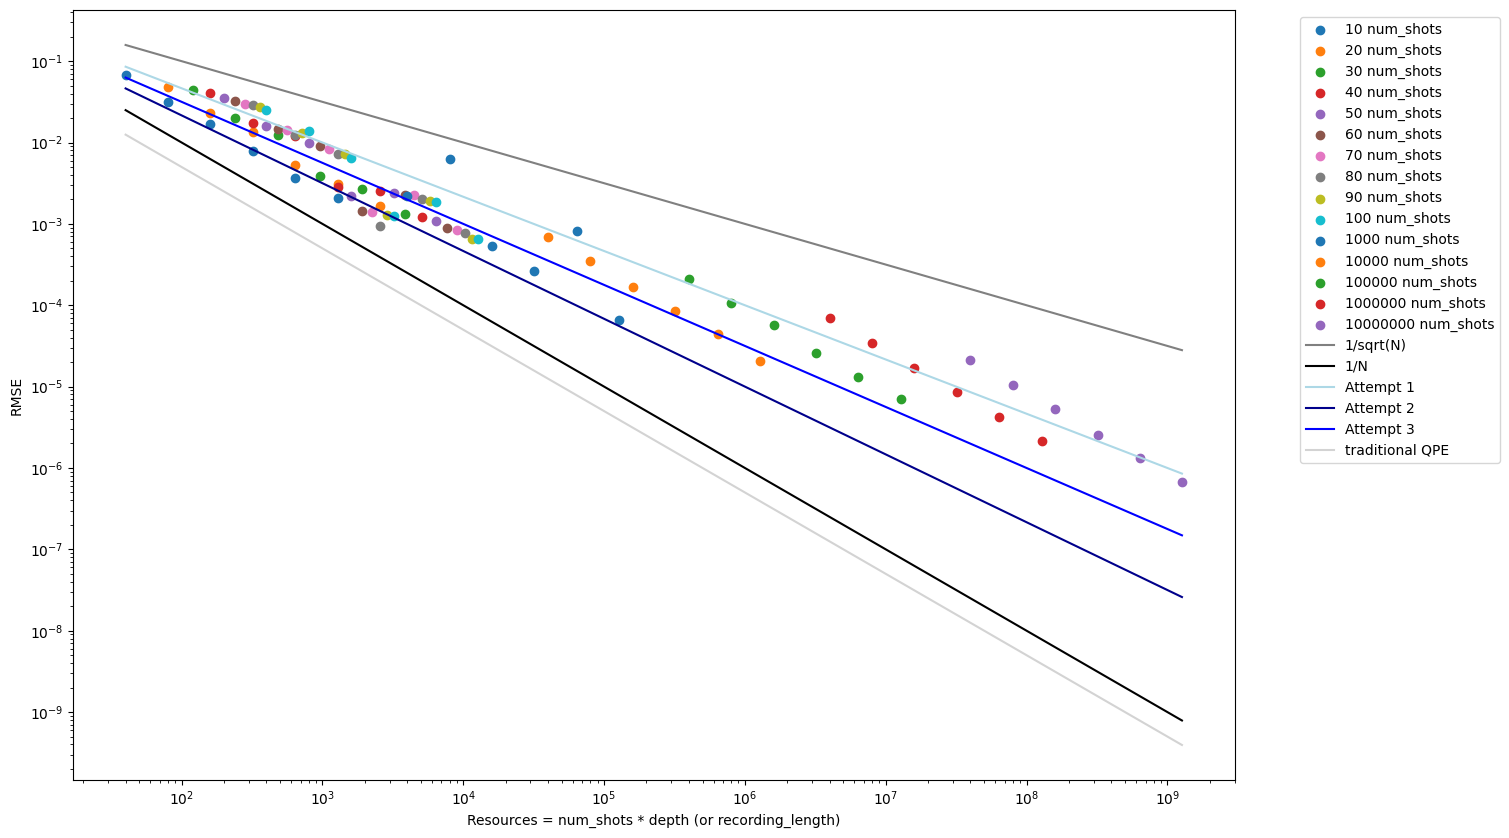

In [114]:
values_dict = {}
with open('data.csv', newline='') as data:
    reader = csv.DictReader(data, delimiter=',')
    for row in reader:
        if int(row['rounds']) == 100:
            if int(row['recording_qubits']) < 8:
                if int(row['num_shots']) in values_dict:
                    if int(row['recording_qubits']) in values_dict[int(row['num_shots'])]:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['sumSE'] += float(row['sumSE'])
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])]['rounds'] += int(row['rounds'])
                    else:
                        values_dict[int(row['num_shots'])][int(row['recording_qubits'])] = {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}
                else:
                    values_dict[int(row['num_shots'])] = {int(row['recording_qubits']): {'sumSE': float(row['sumSE']), 'rounds': int(row['rounds'])}}


plt.figure(figsize = (15, 10))
plt.xscale('log')
plt.yscale('log')

#x_list = []
#y_list = []
for key, value in values_dict.items():
    #if key >= 100:
    num_qubits = list(value.keys())
    x_list = [(key * (2**x)) for x in num_qubits]
    y_list = [np.sqrt(value[recording_qubits]['sumSE']/value[recording_qubits]['rounds']) for recording_qubits in value]
    plt.scatter(x_list, y_list, label= str(key) + ' num_shots')

#plt.plot(x_list, y_list, label= str(key) + ' num_shots')
x_list = range(40, 1280000000+1, 10000000)
plt.plot(x_list, [1/(np.sqrt(x)) for x in x_list], color = 'grey', label='1/sqrt(N)')
plt.plot(x_list, [1/(x) for x in x_list], color = 'black', label='1/N')
plt.plot(x_list, [1/(np.sqrt(math.cbrt(x)**2) * math.cbrt(x)) for x in x_list], color = 'lightblue', label='Attempt 1')
plt.plot(x_list, [1/(np.sqrt(math.cbrt(x)) * (math.cbrt(x) ** 2)) for x in x_list], color = 'darkblue', label='Attempt 2')
plt.plot(x_list, [1/(np.sqrt(math.sqrt(x)) * math.sqrt(x)) for x in x_list], color = 'blue', label='Attempt 3')
plt.plot(x_list, [0.5 * (1/(x)) for x in x_list], color = 'lightgrey', label='traditional QPE')
plt.xlabel('Resources = num_shots * depth (or recording_length)')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1))